<a href="https://colab.research.google.com/github/zahidrahat/Prediction-Using-Multiple-Model-Lab/blob/main/Prediction_Multiple_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Lab/customer_churn_dataset-testing-master.csv')
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [4]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [5]:
df.dropna(inplace=True)

In [6]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [7]:
drop_cols = ['CustomerID', 'Age', 'Gender']
df1 = df.drop(columns=drop_cols, axis=1)
df1

,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,25,14,4,27,Basic,Monthly,598,9,1
1,28,28,7,13,Standard,Monthly,584,20,0
2,27,10,2,29,Premium,Annual,757,21,0
3,9,12,5,17,Premium,Quarterly,232,18,0
4,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...
64369,33,12,6,21,Basic,Quarterly,947,14,1
64370,6,1,5,22,Standard,Annual,923,9,1
64371,39,14,8,30,Premium,Monthly,327,20,1
64372,18,19,7,22,Standard,Monthly,540,13,1


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# label encode the columns which have object type data
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])
df1

,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,25,14,4,27,0,1,598,9,1
1,28,28,7,13,2,1,584,20,0
2,27,10,2,29,1,0,757,21,0
3,9,12,5,17,1,2,232,18,0
4,58,24,9,2,2,0,533,18,0
...,...,...,...,...,...,...,...,...,...
64369,33,12,6,21,0,2,947,14,1
64370,6,1,5,22,2,0,923,9,1
64371,39,14,8,30,1,1,327,20,1
64372,18,19,7,22,2,1,540,13,1


In [9]:
# Feature-Label split
X = df1.drop('Churn', axis=1)
y = df1['Churn']

In [10]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [12]:
#Binary Class Classification

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Here using 3 models
model = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=20, random_state=42)
}

Model: Decision Tree
Accuracy: 0.8956116504854369
Precision: 0.896021397525911
Recall: 0.8812890496547189
F1 Score: 0.8885941644562334

Confusion Matrix:
[[6171  622]
 [ 722 5360]]

Model: K-Nearest Neighbors
Accuracy: 0.8608932038834951
Precision: 0.8314537308821257
Recall: 0.8849062808286747
F1 Score: 0.8573476702508961

Confusion Matrix:
[[5702 1091]
 [ 700 5382]]

Model: Random Forest
Accuracy: 0.9143300970873787
Precision: 0.8874708171206226
Recall: 0.937520552449852
F1 Score: 0.9118093867434237

Confusion Matrix:
[[6070  723]
 [ 380 5702]]



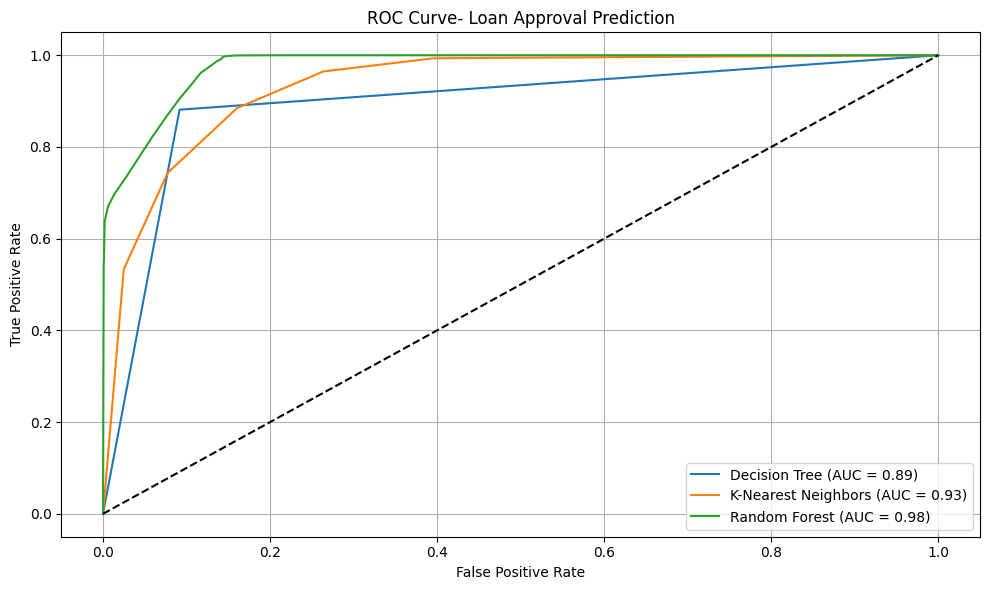

In [15]:
# Model train and Prediction
plt.figure(figsize=(10, 6))
for name, model in model.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}\n')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# ROC curve plotting for all 3 models
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve- Loan Approval Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Lab/Cybersecurity_Dataset.csv')
dataset

,Threat Category,IOCs (Indicators of Compromise),Threat Actor,Attack Vector,Geographical Location,Sentiment in Forums,Severity Score,Predicted Threat Category,Suggested Defense Mechanism,Risk Level Prediction,Cleaned Threat Description,Keyword Extraction,Named Entities (NER),Topic Modeling Labels,Word Count
0,DDoS,['123.456.78.9'],APT-28,Email,North Korea,0.99,5,DDoS,Increase Web Security,4,ransomware attack through network vulnerability,"['malware', 'email', 'attachment']","['CompanyY', 'Malware']",Malware,47
1,Malware,"['10.0.0.2', 'infected.exe']",Lazarus Group,Network,USA,0.97,1,DDoS,Quarantine,4,phishing email with malicious link,"['DDoS', 'website', 'attack']","['Unknown', 'Phishing Service']",Phishing,31
2,Phishing,"['malwarehash123', 'trojan.com']",APT-28,Email,North Korea,0.87,3,Phishing,Quarantine,2,ransomware attack through network vulnerability,"['phishing', 'corporate', 'scam']","['CompanyY', 'Malware']",Malware,24
3,DDoS,"['192.168.1.1', 'malicious.com']",Lazarus Group,Web,Global,0.64,2,Phishing,Quarantine,1,phishing email with malicious link,"['DDoS', 'website', 'attack']","['CompanyY', 'Malware']",DDoS,46
4,DDoS,"['malwarehash123', 'trojan.com']",Unknown,Email,Germany,0.57,1,DDoS,Patch Vulnerability,1,phishing scam targeting corporate accounts,"['DDoS', 'website', 'attack']","['Lazarus Group', 'Network Device']",DDoS,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Ransomware,['123.456.78.9'],Anonymous,Email,Germany,0.76,5,Ransomware,Increase Web Security,2,malware detected in email attachment,"['malware', 'email', 'attachment']","['Lazarus Group', 'Network Device']",Phishing,39
1096,Ransomware,"['malicious.net', 'spam.exe']",Unknown,Email,USA,0.59,4,Phishing,Monitor for Phishing,3,malware detected in email attachment,"['phishing', 'corporate', 'scam']","['Anonymous', 'Website']",Ransomware,22
1097,Ransomware,"['192.168.1.1', 'malicious.com']",APT-28,Email,North Korea,0.58,3,Ransomware,Quarantine,2,malware detected in email attachment,"['phishing', 'link', 'email']","['Lazarus Group', 'Network Device']",Phishing,23
1098,Ransomware,"['192.168.1.1', 'malicious.com']",APT-28,Web,Russia,0.73,1,Phishing,Quarantine,5,phishing scam targeting corporate accounts,"['ransomware', 'network', 'vulnerability']","['Anonymous', 'Website']",Phishing,17


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Threat Category                  1100 non-null   object 
 1   IOCs (Indicators of Compromise)  1100 non-null   object 
 2   Threat Actor                     1100 non-null   object 
 3   Attack Vector                    1100 non-null   object 
 4   Geographical Location            1100 non-null   object 
 5   Sentiment in Forums              1100 non-null   float64
 6   Severity Score                   1100 non-null   int64  
 7   Predicted Threat Category        1100 non-null   object 
 8   Suggested Defense Mechanism      1100 non-null   object 
 9   Risk Level Prediction            1100 non-null   int64  
 10  Cleaned Threat Description       1100 non-null   object 
 11  Keyword Extraction               1100 non-null   object 
 12  Named Entities (NER)

In [18]:
dataset.isnull().sum()

,0
Threat Category,0
IOCs (Indicators of Compromise),0
Threat Actor,0
Attack Vector,0
Geographical Location,0
Sentiment in Forums,0
Severity Score,0
Predicted Threat Category,0
Suggested Defense Mechanism,0
Risk Level Prediction,0


In [19]:
dataset.describe()

,Sentiment in Forums,Severity Score,Risk Level Prediction,Word Count
count,1100.000000,1100.000000,1100.000000,1100.000000
mean,0.742618,2.990000,2.903636,29.748182
std,0.145544,1.424116,1.442809,11.371998
min,0.500000,1.000000,1.000000,10.000000
25%,0.620000,2.000000,2.000000,20.000000
50%,0.740000,3.000000,3.000000,30.000000
75%,0.870000,4.000000,4.000000,39.000000
max,1.000000,5.000000,5.000000,49.000000


In [20]:
# Split Feature-Label column
X = dataset.drop('Word Count', axis=1)
y = dataset['Word Count']

In [21]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_
class_names

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Lab/Cybersecurity_Dataset.csv')

# Select numeric features for scaling
X = df[['Sentiment in Forums', 'Severity Score', 'Risk Level Prediction', 'Word Count']]

# Target variable (example: using "Threat Category" as label — adjust as needed)
y = df['Threat Category']

# Scale the numeric features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [26]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [27]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Model Define
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=31),
    'Random Forest': RandomForestClassifier(n_estimators=20, random_state=4)
}


Decision Tree Metrics:

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix:
[[11  0  0 ...  0  0  0]
 [ 0  7  0 ...  0  0  0]
 [ 0  0  6 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  8]]


K-Nearest Neighbors Metrics:

Accuracy: 0.11363636363636363
Precision: 0.12861885480419963
Recall: 0.099258658008658
F1 Score: 0.0923381887720123

Confusion Matrix:
[[2 0 2 ... 0 0 0]
 [2 0 3 ... 0 0 0]
 [1 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 1]]


Random Forest Metrics:

Accuracy: 0.7545454545454545
Precision: 0.7360894660894661
Recall: 0.7327858946608947
F1 Score: 0.7106242654404419

Confusion Matrix:
[[11  0  0 ...  0  0  0]
 [ 0  3  3 ...  0  0  0]
 [ 0  2  3 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0  7  1]
 [ 0  0  0 ...  0  0  8]]



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn

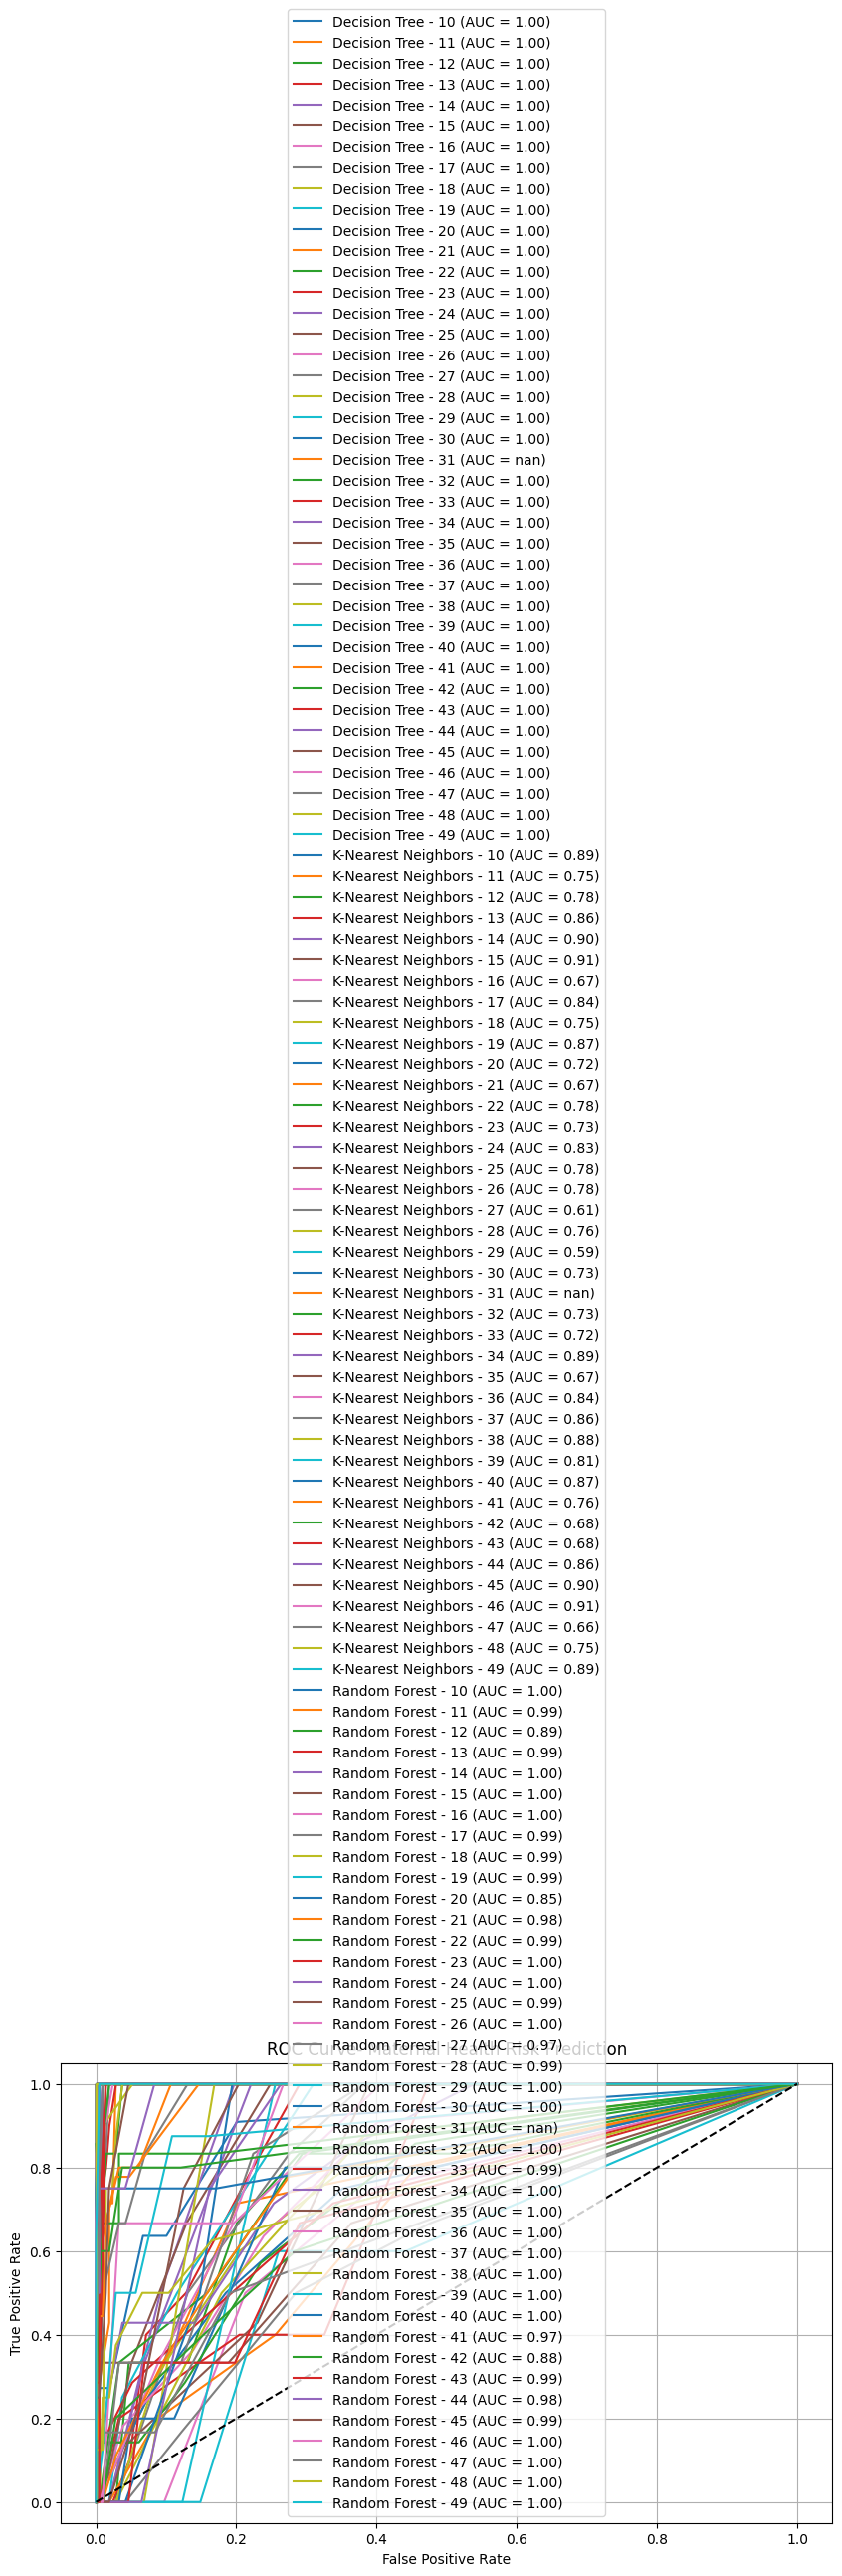

In [29]:
# Train, Test, Evaluate
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test) # for roc-auc value we need this probability

    print(f'\n{name} Metrics:\n')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
    print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')
    print(f'F1 Score: {f1_score(y_test, y_pred, average="macro")}\n')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

    y_test_bin = label_binarize(y_test, classes=range(len(class_names)))

    for i in range(len(class_names)):
        fpr, tpr, thresholds = roc_curve(y_test_bin[:,i], y_pred_proba[:, i])
        plt.plot(fpr, tpr, label=f'{name} - {class_names[i]} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve- Maternal Health Risk Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()